# Equations

In [1]:
import sympy as sp
from sympy.abc import t
omega_x = sp.Symbol('\\omega_x')
omega_y = sp.Symbol('\\omega_y')
omega_z = sp.Symbol('\\omega_z')

theta = sp.Function('\\theta')(t)
phi = sp.Function('\\varphi')(t)
psi = sp.Function('\\psi')(t)
DpsiDt = sp.Symbol('\\dot{\\psi}')
DthetaDt = sp.Symbol('\\dot{\\theta}')
DphiDt = sp.Symbol('\\dot{\\varphi}')

In [2]:
Vars = [DpsiDt, DthetaDt, DphiDt]
vars = [psi, theta, phi]

eq1 = DpsiDt * sp.sin(theta) * sp.sin(phi) + DthetaDt * sp.cos(phi) - omega_x
eq2 = DpsiDt * sp.sin(theta) * sp.cos(phi) - DthetaDt * sp.sin(phi) - omega_y
eq3 = DphiDt + DpsiDt * sp.cos(theta) - omega_z

Eqs = [eq1, eq2, eq3]
V = sp.solve(Eqs,(DpsiDt,DthetaDt,DphiDt))
eqs = [sp.Eq(vars[i].diff(t),sp.simplify(V[Vars[i]])) for i in range(3)]

In [3]:
sp.simplify(V[Vars[0]])

(\omega_x*sin(\varphi(t)) + \omega_y*cos(\varphi(t)))/sin(\theta(t))

In [4]:
eqs[2]

Eq(Derivative(\varphi(t), t), (-\omega_x*sin(\varphi(t)) - \omega_y*cos(\varphi(t)) + \omega_z*tan(\theta(t)))/tan(\theta(t)))

# Numerical Solution

In [5]:
def dUdt(t,vars,omega):
    psi = vars[0]
    theta = vars[1]
    phi = vars[2]
    return [(np.sin(phi)*omega[0] + np.cos(phi)*omega[1])/np.sin(theta), -np.sin(phi)*omega[1]+np.cos(phi)*omega[0], -(np.sin(phi)*omega[0] + np.cos(phi)*omega[1]) / np.tan(theta)+omega[2]]

In [6]:
import numpy as np
from scipy.integrate import odeint, RK45, solve_ivp

T = 40
tspan = np.linspace(0,T,num=5000*T)

yinit = [.5, .5, .5]
omega = [1,1,1]

solution = solve_ivp(lambda t,y: dUdt(t,y,omega),[tspan[0],tspan[-1]],yinit,t_eval=tspan)

In [7]:
import matplotlib.pyplot as plt

plt.plot(tspan, (solution.y[0]%(np.pi * 2))*180/np.pi,label='$\\psi$',lw=3)
plt.plot(tspan, (solution.y[1]%(np.pi * 2))*180/np.pi,label='$\\theta$',lw=3)
plt.plot(tspan, (solution.y[2]%(np.pi * 2))*180/np.pi,label='$\\phi$',lw=3)
plt.title('omega = ({},{},{})'.format(omega[0],omega[1],omega[2]))
plt.xlabel('time')
plt.ylabel('degree')
plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.grid()
plt.show()

<Figure size 640x480 with 1 Axes>

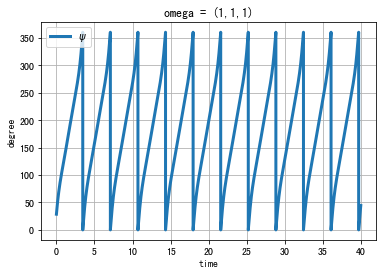

In [8]:
import matplotlib.pyplot as plt

plt.plot(tspan, (solution.y[0]%(np.pi * 2))*180/np.pi,label='$\\psi$',lw=3)
#plt.plot(tspan, (solution.y[1]%(np.pi * 2))*180/np.pi,label='$\\theta$',lw=3)
#plt.plot(tspan, (solution.y[2]%(np.pi * 2))*180/np.pi,label='$\\phi$',lw=3)
plt.title('omega = ({},{},{})'.format(omega[0],omega[1],omega[2]))
plt.xlabel('time')
plt.ylabel('degree')
plt.legend()
#plt.xlim(left=0)
#plt.ylim(bottom=0)
plt.grid()
plt.show()

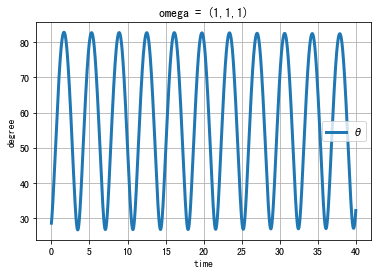

In [9]:
import matplotlib.pyplot as plt

#plt.plot(tspan, (solution.y[0]%(np.pi * 2))*180/np.pi,label='$\\psi$',lw=3)
plt.plot(tspan, (solution.y[1]%(np.pi * 2))*180/np.pi,label='$\\theta$',lw=3)
#plt.plot(tspan, (solution.y[2]%(np.pi * 2))*180/np.pi,label='$\\phi$',lw=3)
plt.title('omega = ({},{},{})'.format(omega[0],omega[1],omega[2]))
plt.xlabel('time')
plt.ylabel('degree')
plt.legend()
#plt.xlim(left=0)
#plt.ylim(bottom=0)
plt.grid()
plt.show()

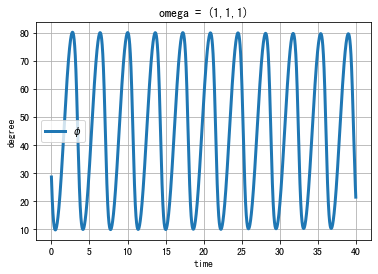

In [10]:
import matplotlib.pyplot as plt

#plt.plot(tspan, (solution.y[0]%(np.pi * 2))*180/np.pi,label='$\\psi$',lw=3)
#plt.plot(tspan, (solution.y[1]%(np.pi * 2))*180/np.pi,label='$\\theta$',lw=3)
plt.plot(tspan, (solution.y[2]%(np.pi * 2))*180/np.pi,label='$\\phi$',lw=3)
plt.title('omega = ({},{},{})'.format(omega[0],omega[1],omega[2]))
plt.xlabel('time')
plt.ylabel('degree')
plt.legend()
#plt.xlim(left=0)
#plt.ylim(bottom=0)
plt.grid()
plt.show()